<a href="https://colab.research.google.com/github/HaveFaith07/HaveFaith-Project/blob/Machine-Learning/FinalAssessmentForMethodsOfPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Assessment of Method Of Prediction(M507B)

Name: Mitesh Patole

Student Number : GH1022321

The data which i have used in this assessment is imported from kaggle
URL: https://www.kaggle.com/datasets/dwiuzila/titanic-machine-learning-from-disaster?select=train.csv

Import Libraries

Here we have imported Libraries which are necessary to run the program wherein if not imported and executed before running any algorithm or any step which has its own library in the back end, the particular step will not execute resulting in a error

In [ ]:
import pandas as pd
import sklearn.model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import sklearn.decomposition
import imblearn.over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import sklearn.svm
from sklearn.model_selection import GridSearchCV
import sklearn.metrics

Loading Data Sets

Here we have 2 datasets Train and Test hence initially we have feeded the train csv file in Data_train and test in Data_test usine Pandas library

In [ ]:
data_train=pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
data_train.head()


Data Preprocessing

Here we have initiated our preprocessing of data, locating for nan, missing values in the data set

In [ ]:
print("Missing values for train")
print(data_train.isna().sum())
print("\nMissing values for test")
print(data_test.isna().sum())

Here, we have merged our dataset as we need to work on both of csv files altogether

In [ ]:
df=pd.concat([data_train,data_test])

Splitting thr data sets into test and train

Here we have splitted the data set using df(DataFrame) using sklearn model selection library and printed the dimensions of the array using .shape in the data frame of test and train

In [ ]:

df_train,df_test = sklearn.model_selection.train_test_split(df,)

print("df_train size:", df_train.shape)
print("df_test size:", df_test.shape)

Here we check the unique value in our data sets in all the columns altogether

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    df_train.nunique()
    print(f"Unique values in column '{column}': {unique_values}")

Here we have checked the sum(total Number of) of missing values in the datasets

In [ ]:
df.isna().sum()

Here we have dropped the missing values by removing certain rows which consists of missing values, if there is an missing value the function inplace=true is gonna drow certain rows from the data sets

In [ ]:

df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

df_train.dropna(axis=1, inplace=True)
df_test.dropna(axis=1, inplace=True)


In order to check if the steps worked or not we here check again for the missing values which resulted in showing 0

In [ ]:
print("Missing values for train")
print(df_train.isna().sum())
print("\nMissing values for test")
print(df_test.isna().sum())

Here we split the datasets intp test and train, from df to x_ train, x_test, y_train, y_test

In [ ]:
x_train = df_train.drop(["Survived"],axis = 1)
y_train = df_train["Survived"]

x_test = df_test.drop(["Survived"],axis=1)
y_test = df_test["Survived"]

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

As a machine only understands binary inputs we thereby use one hot encoder to convert the values to 0's an 1's in order we have put in handle  ignore as we could have used unknown instead i felt to use ignore as it will consider those unknown values as zeroes, hence making it easier for the machine to implement the possible and reasonable measures

In [ ]:
enc = OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(x_train)

x_train = enc.transform(x_train)

x_test = enc.transform(x_test)

Here we use standardization in order to make the machine to prioritize values as the machine would consider all the values as common throughout the data hence to differentiate them certain data should lie in certain coordinates we scale it in a certain way

In [ ]:
scaler = sklearn.preprocessing.StandardScaler(with_mean = False)
scaler.fit(x_train)

x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)


Here we split our data into smalller groups in order to implement our machine learning tasks in a precise manner



In [ ]:
pca = sklearn.decomposition.PCA(n_components = 90)
pca.fit(x_train.toarray())
x_train = pca.transform(x_train.toarray())
x_test = pca.transform(x_test.toarray())

SMOTE is used in order to balance the data, where in it help with overfitting which is caused due to over sampling

In [ ]:
sm = imblearn.over_sampling.SMOTE()
x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
print("x_train_resampled size:", x_train_resampled.shape)
print("y_train_resampled size:", y_train_resampled.shape)


Random forest algorithm combines multiple decision tree in order to create a more accurate model, in order to get a final accurate prediction it combines multiple decision tree, Random forest provides a better accuracy and avoids overfitting, Random forest algorithm can be used for both classification and regression tasks.

In [ ]:

parameters_ranfor={
   'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [10, 15, 20]

}
model_ranfor = sklearn.ensemble.RandomForestClassifier()
model_ranfor.fit(x_train_resampled,y_train_resampled)
clf_model_ranfor=sklearn.model_selection.GridSearchCV(model_ranfor,parameters_ranfor,scoring="accuracy",cv=5,
                                                  n_jobs=-1)
clf_model_ranfor.fit(x_train_resampled,y_train_resampled)
print("Accuracy of best Random Forest Classifier = {:.2f}".format(clf_model_ranfor.best_score_))
print("Best found hyperparameters of Random Forest classifier = {}".format(clf_model_ranfor.best_params_))

Gradient boosting subsequently trains a number of weak prediction models and works towards improvement of performance of the model, Each model focuses on resolving the problems or inappropriate execution of the previous prediction models, Gradient boosting also is widely used for classification as well as regression tasks

In [ ]:

parameters_gb={
    "learning_rate":[0.01,0.1,0.2],
    "n_estimators":range(50,240,50)

}
model_gb = sklearn.ensemble.GradientBoostingClassifier()
model_gb.fit(x_train_resampled,y_train_resampled)
clf_model_gb=sklearn.model_selection.RandomizedSearchCV(model_gb,parameters_gb,scoring="accuracy",cv=5,
                                                  n_jobs=-1)
clf_model_gb.fit(x_train_resampled,y_train_resampled)

print("Accuracy of best Gradient Boosting Classifier = {:.2f}".format(clf_model_gb.best_score_))
print("Best found hyperparameters of Gradient Boosting classifier = {}".format(clf_model_gb.best_params_))

In order to perform classification MLP- Multi Layered Perceptron relies upon the neural networks, also can be used for regression task, As the name itself resembles, MLP classifier uses multiple layers in order to perform the neural network tasks

In [ ]:

parameters_neunet = {
    'random_state': [42],
    'early_stopping': [False],
    'activation': ['relu'],
    'max_iter': [500],
    'alpha': [0.0001, 0.001, 0.01],
    'hidden_layer_sizes': [(100, 200, 300)],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'solver': ['adam']
}
model_neunet=sklearn.neural_network.MLPClassifier()
model_neunet.fit(x_train_resampled, y_train_resampled)

clf_model_neunet= sklearn.model_selection.GridSearchCV(model_neunet, parameters_neunet, cv=5)
clf_model_neunet.fit(x_train_resampled, y_train_resampled)



print("Accuracy of best MLP Classifier = {:.2f}".format(clf_model_neunet.best_score_))
print("Best found hyperparameters of MLP classifier = {}".format(clf_model_neunet.best_params_))



SVM - Support Vector machine Algorithm is also used to perform classification tasks as well as Regression tasks, SVM mainly focuses on distribution of classes which would result into shorter overfitting problem hence provides a better accuracy score

In [ ]:

parameters_svm = {'C': [0.01,0.1,10,20],
                  'kernel': ['rbf','linear']}
model_svm = sklearn.svm.SVC()
model_svm.fit(x_train_resampled,y_train_resampled)
clf_model_svm = sklearn.model_selection.GridSearchCV(model_svm,parameters_svm,cv=5)
clf_model_svm.fit(x_train_resampled,y_train_resampled)

print("Accuracy of best SVM Classifier = {:.2f}".format(clf_model_svm.best_score_))
print("Best found hyperparameters of SVM classifier = {}".format(clf_model_svm.best_params_))



Here we find out the accuracy, precision,recall, F1-score and Confusion matrix of the best model we have trained

In [ ]:
y_predicted=clf_model_svm.predict(x_test)
accuracy=sklearn.metrics.accuracy_score(y_test,y_predicted)
cm=sklearn.metrics.confusion_matrix(y_test,y_predicted)
precision,recall,f1,support=sklearn.metrics.precision_recall_fscore_support(y_test,y_predicted)

print("Accuracy =",accuracy)
print("Precision",precision)
print("Recall",recall)
print("F1-score",f1)
print("Confusion Matrix:\n",cm)

In [ ]:
!jupyter nbconvert --to html FinalAssessmentForMethodsOfPrediction.ipynb

[NbConvertApp] Converting notebook FinalAssessmentForMethodsOfPrediction.ipynb to html
[NbConvertApp] Writing 809717 bytes to FinalAssessmentForMethodsOfPrediction.html


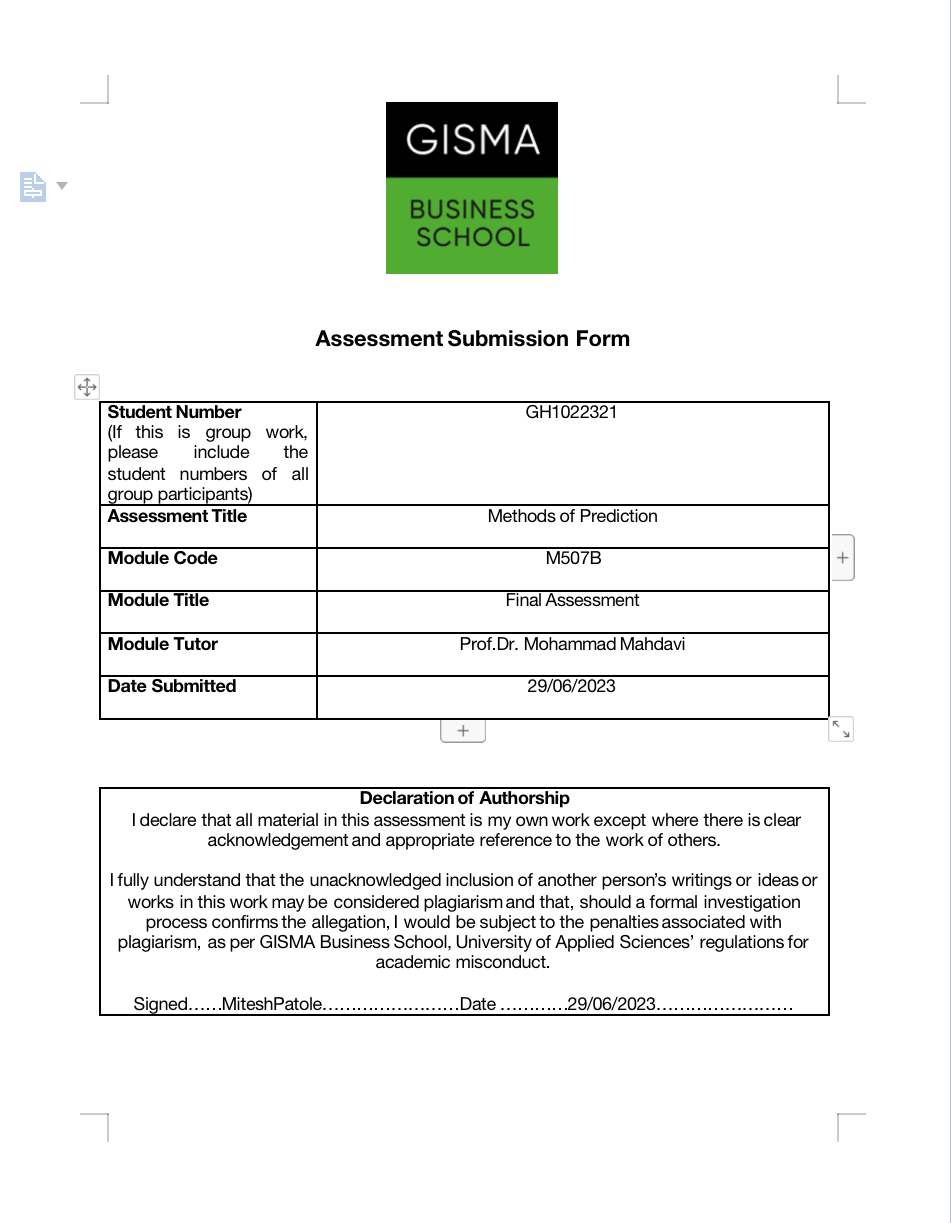